Imports

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Reading In + First Model

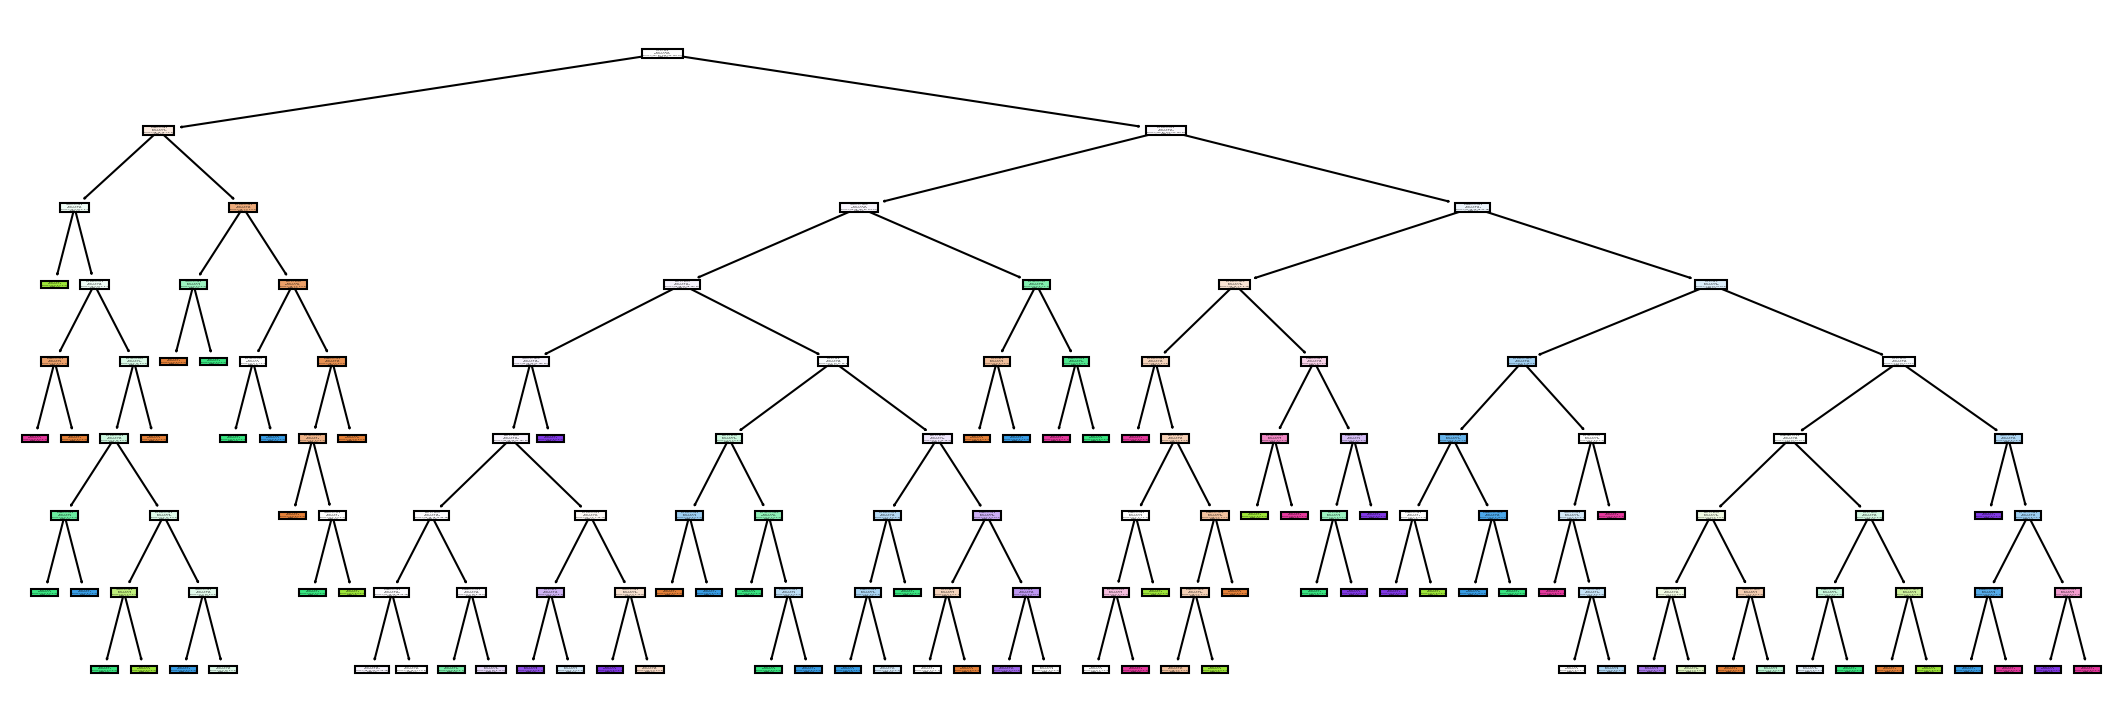

0.225


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,True
796,700,50,160,110,160,110,110,True
797,600,80,110,60,150,130,70,True
798,680,80,160,60,170,130,80,True


In [18]:
# Reading
df = pd.read_csv('Pokemon.csv')
xbase = df[["Total",  "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary"]]
ybase = df[["Generation"]]

# Splitting
x_train, x_test, y_train, y_test = train_test_split(xbase, ybase, test_size = 0.10)

# Tree Model
classifier = DecisionTreeClassifier(max_depth = 8)
classifier = classifier.fit(x_train, y_train)

# Plotting Decision Tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18,6), dpi=150)
tree.plot_tree(classifier, feature_names = ["Total",  "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary"], class_names = ["1","2","3","4","5","6"], filled = True)
plt.show()

# Accuracy
y_predict = classifier.predict(x_test)
accuracy = classifier.score(x_test, y_test)

print(accuracy)

# Display input data (for visualization)
xbase

Optimizing

In [11]:
# Cycling through to find optimial split size + tree depth

for i in np.linspace(0.05, 0.95, num=19):
    
    optimal = [0, 0]
    
    for j in range(60):

        score = 0
        
        # Tests model multiple times and finds average
        
        for k in range(10):
            
            x_train, x_test, y_train, y_test = train_test_split(xbase, ybase, test_size = i)

            classifier = DecisionTreeClassifier(max_depth = j+1)
            classifier = classifier.fit(x_train, y_train)

            score += classifier.score(x_test, y_test)/10
            
        if score > optimal[1]:
            optimal[1] = score
            optimal[0] = j + 1
    
    print("Test size: " + str(round(i,2)) + ", Best depth: " + str(optimal[0]) + ", Average Score: " + str(optimal[1]))

Test size: 0.05, Best depth: 9, Average Score: 0.2975
Test size: 0.1, Best depth: 47, Average Score: 0.26749999999999996
Test size: 0.15, Best depth: 31, Average Score: 0.27
Test size: 0.2, Best depth: 42, Average Score: 0.265
Test size: 0.25, Best depth: 37, Average Score: 0.264
Test size: 0.3, Best depth: 44, Average Score: 0.25083333333333335
Test size: 0.35, Best depth: 17, Average Score: 0.24928571428571428
Test size: 0.4, Best depth: 60, Average Score: 0.2503125
Test size: 0.45, Best depth: 59, Average Score: 0.24666666666666667
Test size: 0.5, Best depth: 47, Average Score: 0.24099999999999996
Test size: 0.55, Best depth: 35, Average Score: 0.2420454545454546
Test size: 0.6, Best depth: 6, Average Score: 0.23666666666666664
Test size: 0.65, Best depth: 15, Average Score: 0.23615384615384613
Test size: 0.7, Best depth: 27, Average Score: 0.2255357142857143
Test size: 0.75, Best depth: 50, Average Score: 0.22083333333333333
Test size: 0.8, Best depth: 14, Average Score: 0.2240625


More thorough optimization

In [13]:
for i in np.linspace(0.15, 0.65, num=26):
    
    optimal = [0, 0]
    
    for j in range(60):

        score = 0
        
        for k in range(50):
            
            x_train, x_test, y_train, y_test = train_test_split(xbase, ybase, test_size = i)

            classifier = DecisionTreeClassifier(max_depth = j+1)
            classifier = classifier.fit(x_train, y_train)

            score += classifier.score(x_test, y_test)/50
            
        if score > optimal[1]:
            optimal[1] = score
            optimal[0] = j + 1
    
    print("Test size: " + str(round(i,2)) + ", Best depth: " + str(optimal[0]) + ", Average Score: " + str(optimal[1]))

Test size: 0.15, Best depth: 27, Average Score: 0.257
Test size: 0.17, Best depth: 11, Average Score: 0.25
Test size: 0.19, Best depth: 25, Average Score: 0.24815789473684208
Test size: 0.21, Best depth: 57, Average Score: 0.2497619047619048
Test size: 0.23, Best depth: 59, Average Score: 0.24815217391304342
Test size: 0.25, Best depth: 18, Average Score: 0.24949999999999997
Test size: 0.27, Best depth: 17, Average Score: 0.2479629629629629
Test size: 0.29, Best depth: 17, Average Score: 0.24257510729613738
Test size: 0.31, Best depth: 41, Average Score: 0.24516129032258066
Test size: 0.33, Best depth: 15, Average Score: 0.24060606060606052
Test size: 0.35, Best depth: 37, Average Score: 0.24557142857142855
Test size: 0.37, Best depth: 26, Average Score: 0.24168918918918927
Test size: 0.39, Best depth: 10, Average Score: 0.24102564102564103
Test size: 0.41, Best depth: 60, Average Score: 0.23756097560975623
Test size: 0.43, Best depth: 23, Average Score: 0.23831884057971012
Test size: 

Removing Legendaries

In [20]:
dfnew = df[df["Legendary"] == False]
xnew = dfnew[["Total",  "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
ynew = dfnew[["Generation"]]

In [21]:
for i in np.linspace(0.05, 0.95, num=19):
    
    optimal = [0, 0]
    
    for j in range(60):

        score = 0
        
        for k in range(10):
            
            x_train, x_test, y_train, y_test = train_test_split(xnew, ynew, test_size = i)

            classifier = DecisionTreeClassifier(max_depth = j+1)
            classifier = classifier.fit(x_train, y_train)

            score += classifier.score(x_test, y_test)/10
            
        if score > optimal[1]:
            optimal[1] = score
            optimal[0] = j + 1
    
    print("Test size: " + str(round(i,2)) + ", Best depth: " + str(optimal[0]) + ", Average Score: " + str(optimal[1]))


Test size: 0.05, Best depth: 10, Average Score: 0.2918918918918919
Test size: 0.1, Best depth: 47, Average Score: 0.2716216216216216
Test size: 0.15, Best depth: 36, Average Score: 0.2828828828828829
Test size: 0.2, Best depth: 39, Average Score: 0.2598639455782313
Test size: 0.25, Best depth: 57, Average Score: 0.26304347826086955
Test size: 0.3, Best depth: 21, Average Score: 0.25565610859728505
Test size: 0.35, Best depth: 19, Average Score: 0.25426356589147286
Test size: 0.4, Best depth: 21, Average Score: 0.24897959183673468
Test size: 0.45, Best depth: 10, Average Score: 0.24350453172205438
Test size: 0.5, Best depth: 18, Average Score: 0.24538043478260868
Test size: 0.55, Best depth: 59, Average Score: 0.23580246913580247
Test size: 0.6, Best depth: 52, Average Score: 0.23469387755102042
Test size: 0.65, Best depth: 45, Average Score: 0.23389121338912133
Test size: 0.7, Best depth: 39, Average Score: 0.2266019417475728
Test size: 0.75, Best depth: 50, Average Score: 0.2242753623

In [24]:
for i in np.linspace(0.10, 0.30, num=11):
    
    optimal = [0, 0]
    
    for j in range(60):

        score = 0
        
        for k in range(50):
            
            x_train, x_test, y_train, y_test = train_test_split(xnew, ynew, test_size = i)

            classifier = DecisionTreeClassifier(max_depth = j+1)
            classifier = classifier.fit(x_train, y_train)

            score += classifier.score(x_test, y_test)/50
            
        if score > optimal[1]:
            optimal[1] = score
            optimal[0] = j + 1
    
    print("Test size: " + str(round(i,2)) + ", Best depth: " + str(optimal[0]) + ", Average Score: " + str(optimal[1]))

Test size: 0.1, Best depth: 46, Average Score: 0.2524324324324324
Test size: 0.12, Best depth: 58, Average Score: 0.25438202247191005
Test size: 0.14, Best depth: 46, Average Score: 0.2524271844660193
Test size: 0.16, Best depth: 23, Average Score: 0.2488135593220339
Test size: 0.18, Best depth: 16, Average Score: 0.2509774436090224
Test size: 0.2, Best depth: 36, Average Score: 0.2525170068027211
Test size: 0.22, Best depth: 30, Average Score: 0.24925925925925924
Test size: 0.24, Best depth: 22, Average Score: 0.24757062146892655
Test size: 0.26, Best depth: 20, Average Score: 0.2469791666666666
Test size: 0.28, Best depth: 38, Average Score: 0.24631067961165048
Test size: 0.3, Best depth: 21, Average Score: 0.24398190045248871
